<a href="https://colab.research.google.com/github/Nikita-devel/DS_Hw11/blob/main/DS_Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

# Завантаження даних imdb
max_features = 10000
maxlen = 500
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Підготовка даних (заповнення або обрізка до maxlen)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense

# Побудова та навчання моделей
models = []

# Проста RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
models.append(("Simple RNN", model_rnn))

# LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
models.append(("LSTM", model_lstm))

# Bidirectional LSTM
model_bidir_lstm = Sequential()
model_bidir_lstm.add(Embedding(max_features, 32))
model_bidir_lstm.add(Bidirectional(LSTM(32)))
model_bidir_lstm.add(Dense(1, activation='sigmoid'))
model_bidir_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
models.append(("Bidirectional LSTM", model_bidir_lstm))

# Deep RNN
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 32))
model_deep_rnn.add(SimpleRNN(32, return_sequences=True))
model_deep_rnn.add(SimpleRNN(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))
model_deep_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
models.append(("Deep RNN", model_deep_rnn))

# Навчання моделей
histories = []
for name, model in models:
    print(f"Training {name} model...")
    history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
    histories.append((name, history))


Training Simple RNN model...
Epoch 1/5
157/157 [==============================] - 30s 173ms/step - loss: 0.6718 - acc: 0.5714 - val_loss: 0.6983 - val_acc: 0.5358
Epoch 2/5
157/157 [==============================] - 25s 162ms/step - loss: 0.4778 - acc: 0.7831 - val_loss: 0.4109 - val_acc: 0.8212
Epoch 3/5
157/157 [==============================] - 25s 162ms/step - loss: 0.3464 - acc: 0.8557 - val_loss: 0.4121 - val_acc: 0.8280
Epoch 4/5
157/157 [==============================] - 27s 173ms/step - loss: 0.2749 - acc: 0.8927 - val_loss: 0.3704 - val_acc: 0.8522
Epoch 5/5
157/157 [==============================] - 25s 162ms/step - loss: 0.2217 - acc: 0.9146 - val_loss: 0.3982 - val_acc: 0.8334
Training LSTM model...
Epoch 1/5
157/157 [==============================] - 63s 384ms/step - loss: 0.6238 - acc: 0.6429 - val_loss: 0.4442 - val_acc: 0.8272
Epoch 2/5
157/157 [==============================] - 57s 363ms/step - loss: 0.3686 - acc: 0.8472 - val_loss: 0.3061 - val_acc: 0.8754
Epoch 3/5


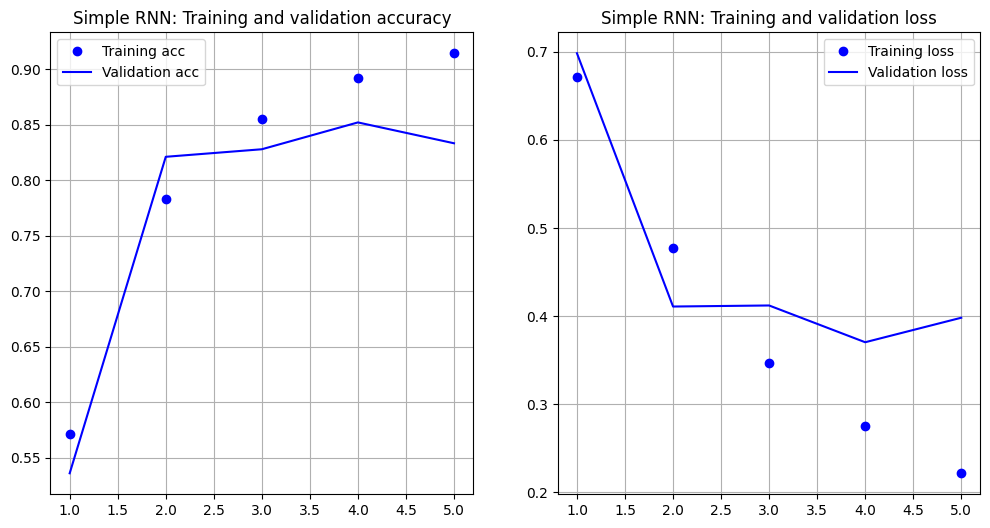

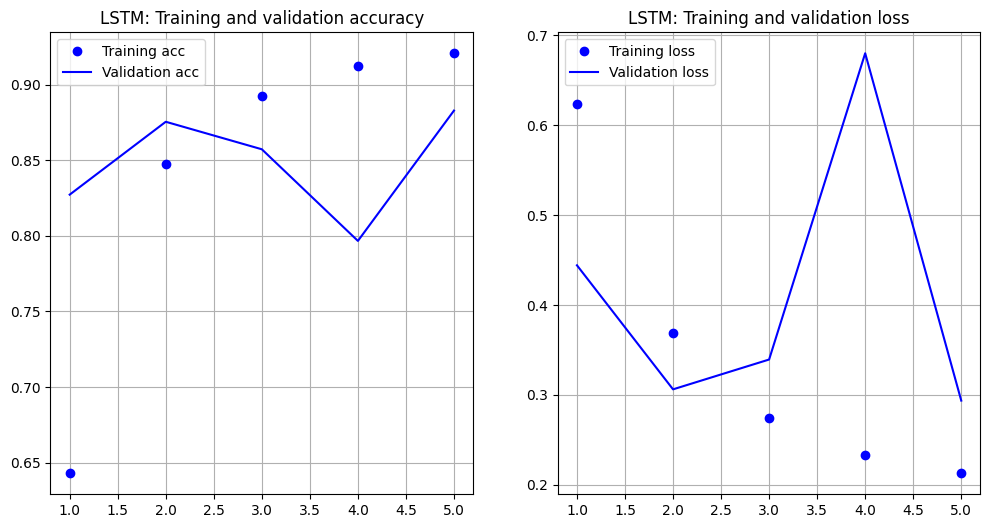

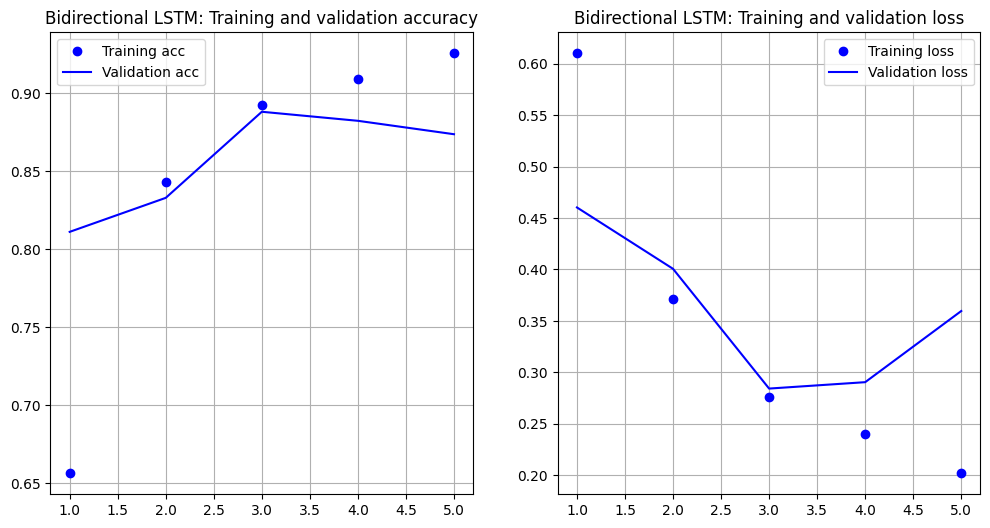

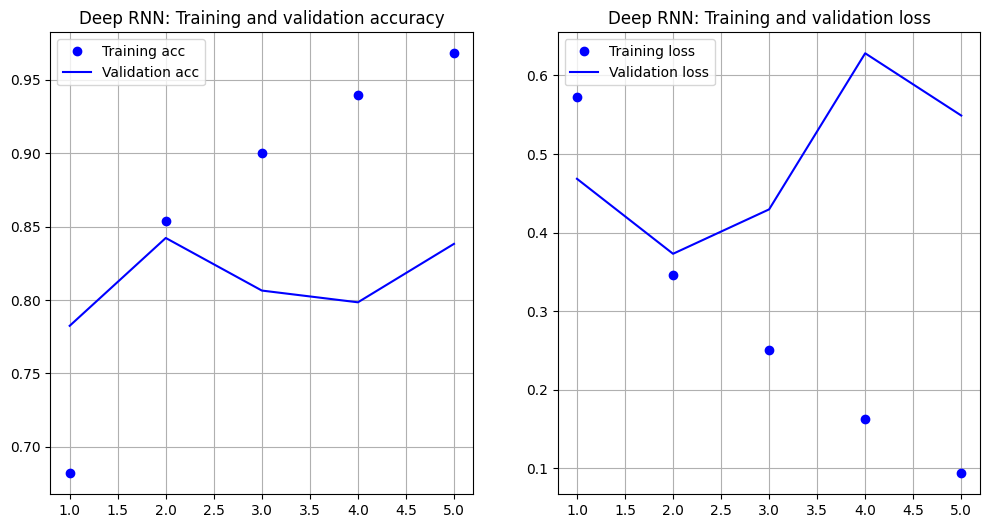

In [3]:
import matplotlib.pyplot as plt

# Оцінка результатів
for name, history in histories:
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'{name}: Training and validation accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{name}: Training and validation loss')
    plt.legend()
    plt.grid()

    plt.show()
